# Student performance in exams DataSet

### Table of Contents

- Introduction
- Business understanding
- Data understanding
- Prepare Data
- Exploratory Data Analysis
- Answer the questions 
- Conclusion

## Introduction

This is Blog Post is a part of the Data Scientist Nanodegree Program requirement from Udacity, I chose to work on a data set about students’ performance on exams.

## Business Understanding

We are interested to determine what all the features which plays a vital role in affecting the student’s performance, and we also solutions on some of the questions for example:

- Q1: Are higher education levels of parents related to the performance of their children?
- Q2: What do you think? Could students get a higher score if they took a test preparation course?
- Q3: Higher scores are correlated with gender?

### Import Libraries and read data

In [1]:
# import for libraries used in the code
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings('ignore') #ignore warning messages

df = pd.read_csv('./Student_DataSet.csv')
df.head() # read a top row in data 

,sex,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_percentage,reading_percentage,writing_percentage
0,F,group B,bachelor's degree,standard,none,0.72,0.72,0.74
1,F,group C,some college,standard,completed,0.69,0.90,0.88
2,F,group B,master's degree,standard,none,0.90,0.95,0.93
3,M,group A,associate's degree,free/reduced,none,0.47,0.57,0.44
4,M,group C,some college,standard,none,0.76,0.78,0.75


## Data Understanding

In [2]:
df.shape #Show the number of rows and number of columns in the dataset

(1000, 8)

In [3]:
df.dtypes #Check the data type for each column

sex                             object
race/ethnicity                  object
parental_level_of_education     object
lunch                           object
test_preparation_course         object
math_percentage                float64
reading_percentage             float64
writing_percentage             float64
dtype: object

Data contains 5 categorical columns and 3 columns contains numeric values.

## Prepare Data

### Missing value

In [4]:
#Is there any missing value?
df.isnull().sum()

sex                            0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_percentage                0
reading_percentage             0
writing_percentage             0
dtype: int64

The DataFrame haven't any missing values.

In [5]:
#Check if there any duplicated values
df.duplicated().sum()

0

The DataFrame haven't any duplicated values.

### Unique values

In [6]:
df.nunique() # find unique values

sex                             2
race/ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_percentage                81
reading_percentage             72
writing_percentage             77
dtype: int64

In [7]:
df.describe().round(2).T # Show the basic statistical details percentile, mean, std etc

,count,mean,std,min,25%,50%,75%,max
math_percentage,1000.0,0.66,0.15,0.00,0.57,0.66,0.77,1.0
reading_percentage,1000.0,0.69,0.15,0.17,0.59,0.70,0.79,1.0
writing_percentage,1000.0,0.68,0.15,0.10,0.58,0.69,0.79,1.0


summary of the data : 

- Maths has the least mean of scores and the least minimum score. The mean in two subjects are almost the same. 

- Every subject has a student who has scored full marks.




In [8]:
# Number of Students passed and Failed in Math  
df['math_pass_status'] = np.where(df['math_percentage'] < 0.50,'Failed','Passed')
df['math_pass_status'].value_counts() 

Passed    865
Failed    135
Name: math_pass_status, dtype: int64

In [9]:
# Number of Students passed and Failed in Reading 
df['reading_pass_status'] = np.where(df['reading_percentage'] < 0.50,'Failed','Passed')
df['reading_pass_status'].value_counts()

Passed    910
Failed     90
Name: reading_pass_status, dtype: int64

In [10]:
# Number of Students passed and Failed in Wrting 
df['writing_pass_status'] = np.where(df['writing_percentage'] < 0.50,'Failed','Passed')
df['writing_pass_status'].value_counts()

Passed    886
Failed    114
Name: writing_pass_status, dtype: int64

In [11]:
# shows the student's final grade (math grade, reading and writing together)
df['final_grade']= ((df['math_percentage']+df['reading_percentage']+df['writing_percentage'])/3).round(2)

In [13]:
# Students status   
df['final_status']  = np.where(df['final_grade'] < 0.50,'Failed','Passed')
df['final_status'].value_counts()

Passed    900
Failed    100
Name: final_status, dtype: int64

In [14]:
# look for observations in every column of the dataset

for i in df.columns:
    print(i,":",df[i].unique())
    print(df[i].value_counts())
    print("________________\n")

sex : ['F' 'M']
F    518
M    482
Name: sex, dtype: int64
________________

race/ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64
________________

parental_level_of_education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64
________________

lunch : ['standard' 'free/reduced']
standard        645
free/reduced    355
Name: lunch, dtype: int64
________________

test_preparation_course : ['none' 'completed']
none         642
completed    358
Name: test_preparation_course, dtype: int64
________________

math_percentage : [0.72 0.69 0.9  0.47 0.76 0.71 0.88 0.4  0.64 0.38 0.58 0.65 0.78 0.5
 0.18 0.46 0.5

### Exploratory Data Analysis

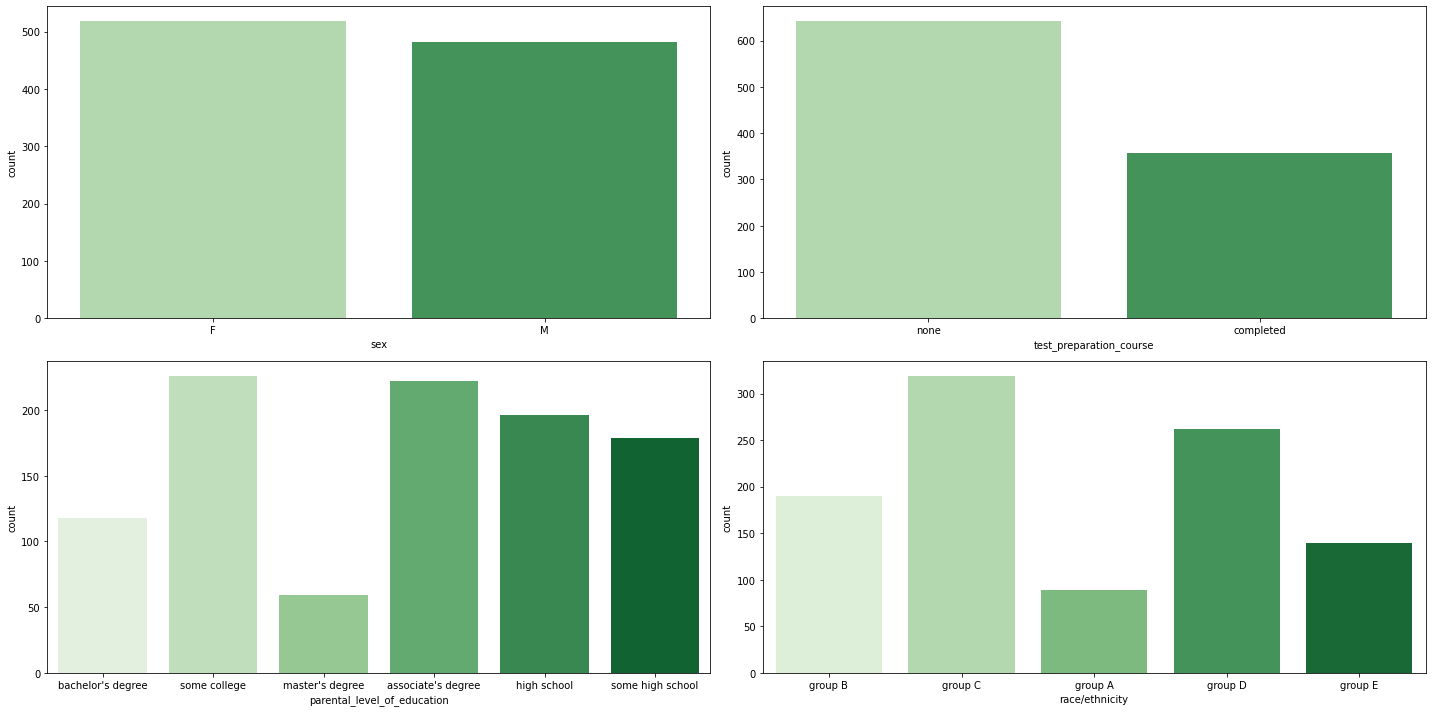

In [16]:
# Plot distribution for Categories in data 

data_set, axes = plt.subplots(2, 2, figsize=(20, 10))

#Plot show for sex
sns.countplot(x='sex',  palette='Greens', data=df, ax=axes[0, 0])
#Plot show for test preparation course:
sns.countplot(x='test_preparation_course', palette='Greens', data=df, ax=axes[0, 1])
#Plot show for parental level of education:
sns.countplot(x='parental_level_of_education', palette='Greens', data=df, ax=axes[1, 0]) 
#Plot show for race/ethnicity :
sns.countplot(x='race/ethnicity', palette='Greens', data=df, ax=axes[1, 1]) 


data_set.tight_layout()

The graphs above provide the following information:

1- In Sex graph, The number of females is greater than the number of males.

2-  In test_preparation_course graph, The majority of students haven't taken any preparation courses.

3- In parental level of education graph, maximum number is the parents who have graduated from college.

4- In race/ethnicity graph, maximum number of students are in group C and then in groups D, B, E and A.


## Answer the questions 

#### Q1: Are higher education levels of parents related to the performance of their children?


To answer the following question, first we need to know the status of parental level of education

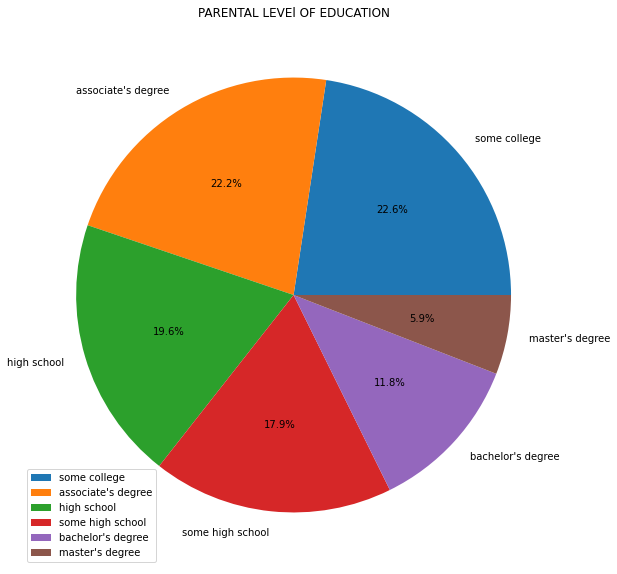

In [17]:
# Plot that show the percentage of parental level of education.
count_test = df['parental_level_of_education'].value_counts()
labels = df['parental_level_of_education'].value_counts().index
plt.figure(figsize=(10,10))
plt.pie(count_test, labels=labels, autopct='%1.1f%%')
plt.legend(labels)
plt.title("PARENTAL LEVEl OF EDUCATION") 
plt.show()

<AxesSubplot:xlabel='parental_level_of_education'>

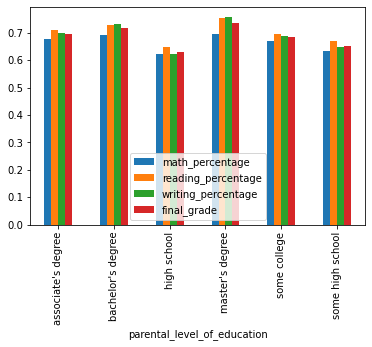

In [18]:
df.groupby('parental_level_of_education').mean().plot.bar() # 

In general, the graph shows that students with parents have master degree  perform better and students whose parents have only completed high school have lower grades than those whose parents have a higher education. Among the three subjects, math has the lowest mean regardless of the parent's degree, implying that students are better at reading and writing skills than math when grouped by parent's level of education.

In [19]:
df.groupby(['parental_level_of_education']).mean().round(2) #

,math_percentage,reading_percentage,writing_percentage,final_grade
parental_level_of_education,,,,
associate's degree,0.68,0.71,0.70,0.70
bachelor's degree,0.69,0.73,0.73,0.72
high school,0.62,0.65,0.62,0.63
master's degree,0.70,0.75,0.76,0.74
some college,0.67,0.69,0.69,0.68
some high school,0.63,0.67,0.65,0.65


The table shows that parents have master degree their students perform better in all subjects. And the students whose parents have high school is have a lower percentage in all subjects.

secondly, let see mark for students in each subject and also the final grade based on their parental level education.

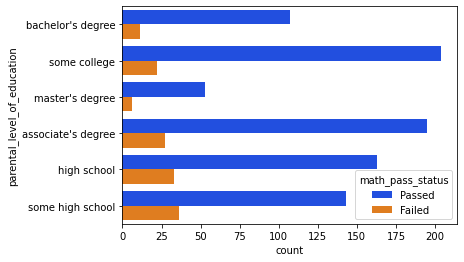

In [20]:
# show the status in math based on parental level of education
p = sns.countplot(y='parental_level_of_education', data=df, hue='math_pass_status', palette='bright')
_ = plt.show()

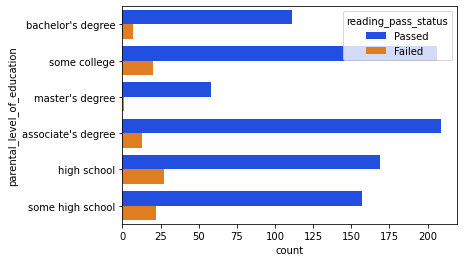

In [21]:
# show the status in Reading based on parental level of education
p = sns.countplot(y='parental_level_of_education', data=df, hue='reading_pass_status', palette='bright')
_ = plt.show()

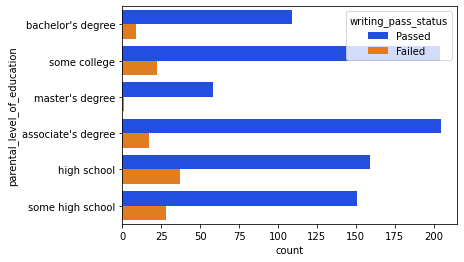

In [22]:
# show the status in Writing based on parental level of education
p = sns.countplot(y='parental_level_of_education', data=df, hue='writing_pass_status', palette='bright')
_ = plt.show()

All the 3 graphs shows that students whose parents have master degree most thier child passed in all subjects. Among the three subjects, math has the lowest mean regardless of the parent's degree, implying that students are better at reading and writing skills than math.

### Q2: What do you think? Could students get a higher score if they took a test preparation course?

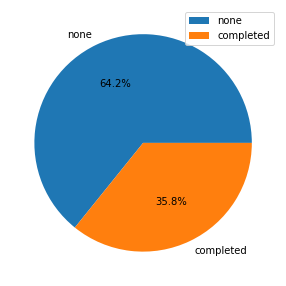

In [25]:
# Plot that show the percentage of the students take any test prep course.
count_test = df['test_preparation_course'].value_counts()
labels = df['test_preparation_course'].value_counts().index
plt.figure(figsize=(5,5))
plt.pie(count_test, labels=labels, autopct='%1.1f%%')
plt.legend(labels)
plt.show()

We see that most students not to take any test preparation course.

- let check if the students take pre course they will get a higher grades

(array([0, 1]), [Text(0, 0, 'completed'), Text(1, 0, 'none')])

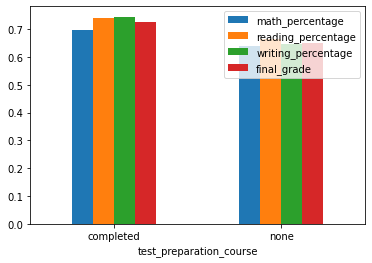

In [26]:
# Plot that show the status of the test preparation course and there grades.
df.groupby('test_preparation_course').mean().plot.bar()
plt.xticks(rotation=360, horizontalalignment="center")

we can see, in general, that students who chose to take a preparatory course were eventually given higher grades.

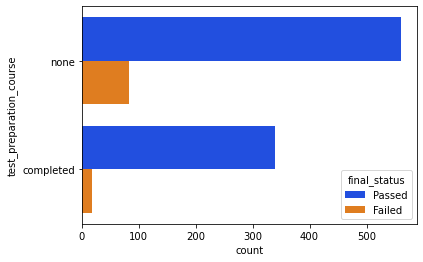

In [36]:
# show the final status based on the student test preparation course or not 
p = sns.countplot(y='test_preparation_course', data=df, hue='final_status', palette='bright')
_ = plt.show()

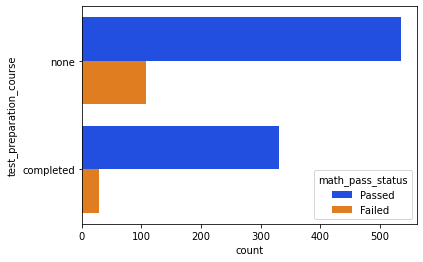

In [27]:
# show the math status based on the student test preparation course or not 
p = sns.countplot(y='test_preparation_course', data=df, hue='math_pass_status', palette='bright')
_ = plt.show()

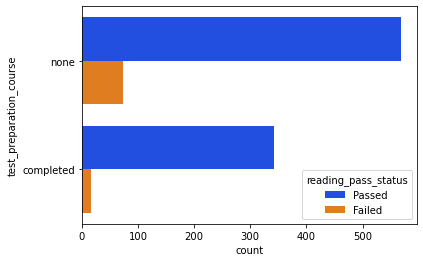

In [28]:
# show the Reading status based on the student test preparation course or not 
p = sns.countplot(y='test_preparation_course', data=df, hue='reading_pass_status', palette='bright')
_ = plt.show()

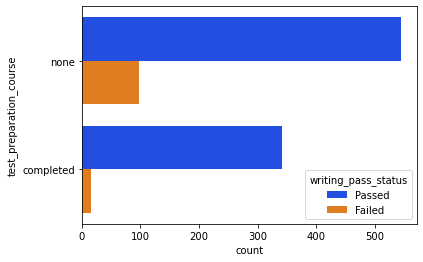

In [29]:
# show the Writing status based on the student test preparation course or not 
p = sns.countplot(y='test_preparation_course', data=df, hue='writing_pass_status', palette='bright')
p = plt.show()

As can be seen test preparation course are also important,, students who have completed a test preparation course performed better than those who did not in all subject. and students who complete them score better.

### Q3: Higher scores are correlated with gender?

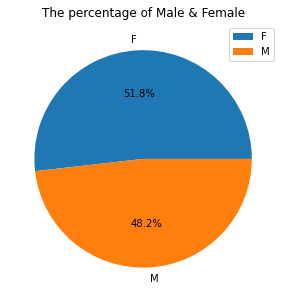

In [30]:
# Plot that show the percentage of the Male & Female.
count_test = df['sex'].value_counts()
labels = df['sex'].value_counts().index
plt.figure(figsize=(5,5))
plt.pie(count_test, labels=labels, autopct='%1.1f%%')
plt.legend(labels)
plt.title("The percentage of Male & Female")
plt.show()

In [31]:
df.groupby(['sex']).mean().round(2) # 

,math_percentage,reading_percentage,writing_percentage,final_grade
sex,,,,
F,0.64,0.73,0.72,0.70
M,0.69,0.65,0.63,0.66


The male students are more successful on math but in other Subjects the female students are more successful.

(array([0, 1]), [Text(0, 0, 'F'), Text(1, 0, 'M')])

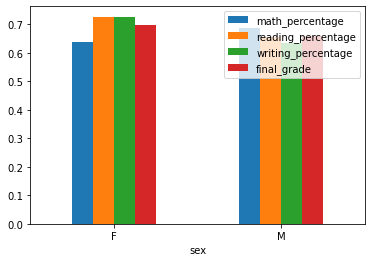

In [32]:
# show the sex based on the grade
df.groupby('sex').mean().plot.bar()
plt.xticks(rotation=360, horizontalalignment="center")

The graph above shows that:  

1- Female students are more successful on reading and write but male students are more successful on math

2- The average maths score of female students is the lowest(compared to male students and the other 2 subjects of females) and their average reading score is highest, almost the same as their reading score.

This means that male students are better in math than female students of the class. Also, among math, reading and writing, male students do better in math.

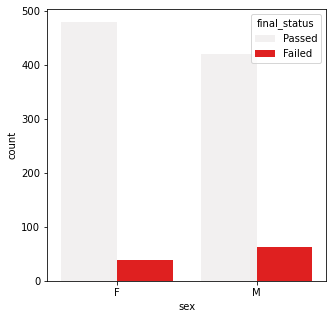

In [33]:
#cheak the distribution of passes and failures by female and male. 
plt.figure(figsize=(5,5))
sns.countplot(x="sex", hue="final_status", data=df, color='red')
plt.show()

Female students are more passes in subjects but on other hand male students are more failures 

## Conclusion

There are few conclusions below:

- Parents’ education level may affect the performance of students. The higher the parental level of education, the higher the average grade of the student.
- Finishing preparation course is beneficial. most of the students who got a high score they finished preparation course.
- In general, the females’ final grade is higher than that of the males. And if we look more deeply: females have higher grades in reading and writing, while males lead in math.

In summary, if students want to have good performance, they should have enough nutrient and make effort to prepare the test.